Reem Alsharabi S20106353

[Data source ](https://www.kaggle.com/datasets/contactprad/bike-share-daily-data)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Data Exploration

In [ ]:
df = pd.read_csv("bike_sharing_daily.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.shape

(731, 16)

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

# Data Wrangling

missing values

In [ ]:
missing_values = df.isnull().sum()

for column in df.columns:
    if missing_values[column] > 0:
        df[column].fillna(df[column].mean(), inplace=True)

This function performs data type conversions and value mappings on specific columns of a DataFrame.

It converts the 'dteday' column to the datetime data type,
several columns to the category data type,
and 'holiday' and 'workingday' columns to the boolean data type.

It also maps encoded values in the 'season', 'weekday', and 'weathersit' columns to more descriptive labels.

In [ ]:
def fix_datatypes(df):
    df['dteday'] = df['dteday'].astype('datetime64')
    df.loc[:,'season':'mnth'] = df.loc[:,'season':'mnth'].astype('category')
    df[['holiday','workingday']] = df[['holiday','workingday']].astype('bool')
    df[['weekday','weathersit']] = df[['weekday','weathersit']].astype('category')

    mapping_season = {1:"1_Winter", 2:"2_Spring", 3:"3_Summer", 4:"4_Fall" }
    mapping_weekdays = {0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday",
                        4:"Thursday", 5:"Friday", 6:"Saturday"}
    mapping_weather = {1:"good", 2:"medium", 3:"poor", 4:"very_poor" }

    df["season"] = df.season.map(mapping_season)
    df["weekday"] = df.weekday.map(mapping_weekdays)
    df["weathersit"] = df.weathersit.map(mapping_weather)

    return df

In [ ]:
df = fix_datatypes(df)

scaling numeric features to ensure they are on a similar scale

In [ ]:
# Standardization
scaler = StandardScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

# Normalization
scaler = MinMaxScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

save the data after performing data wrangling

In [ ]:
df.to_csv('wrangled_data.csv', index=False)

# EDA

## Descriptive Statistics

summary statistics of numerical column

In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.543594,0.518864,0.645649,0.346536,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.228091,0.213909,0.146457,0.159766,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.346343,0.339674,0.534704,0.232045,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.547268,0.535113,0.644388,0.326928,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.743002,0.695083,0.750857,0.434622,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3410.000000,6946.000000,8714.000000


## Data Visualization

distribution of categorical variables

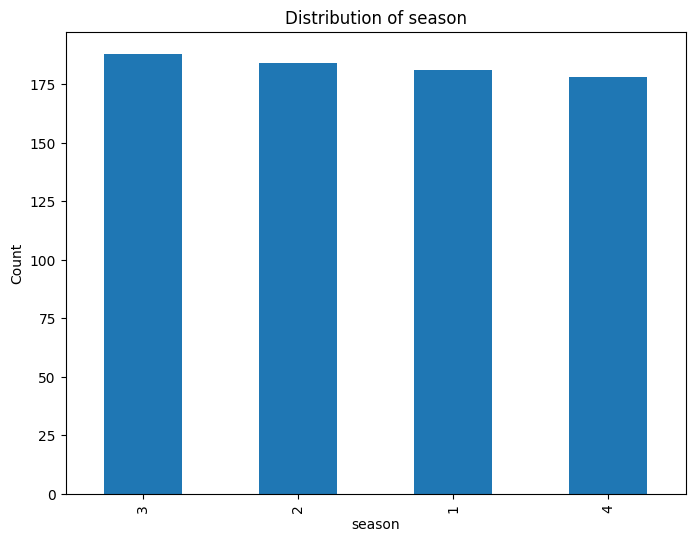

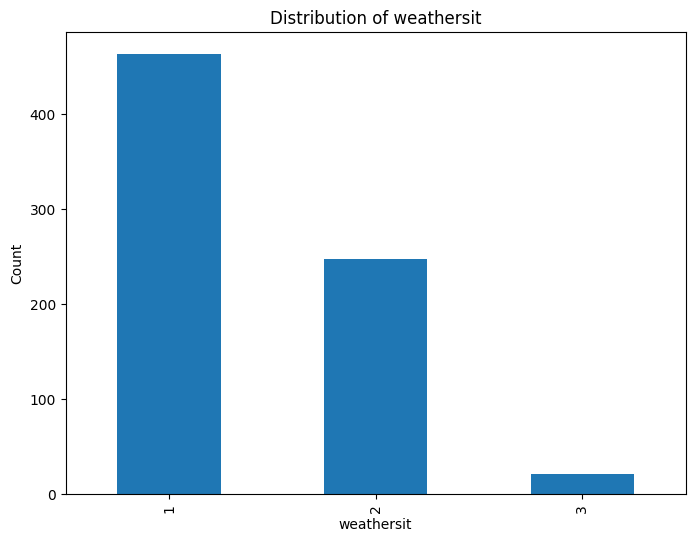

In [ ]:
import matplotlib.pyplot as plt

categorical_variables = ['season', 'weathersit']

for variable in categorical_variables:
    plt.figure(figsize=(8, 6))
    df[variable].value_counts().plot(kind='bar')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Distribution of {variable}')
    plt.show()

Histograms for numerical variables

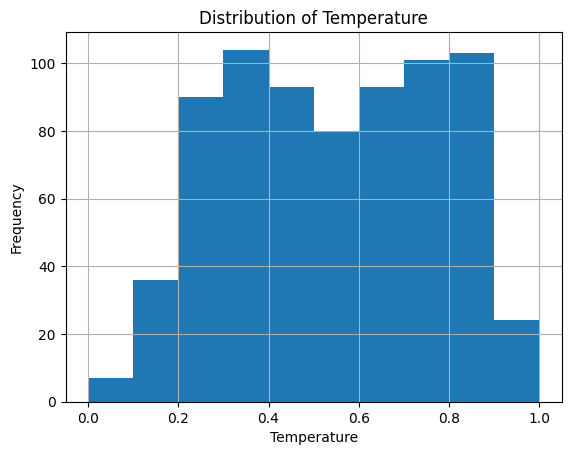

In [ ]:
df['temp'].hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')
plt.show()

Scatter plot to analyze the relationship between variables

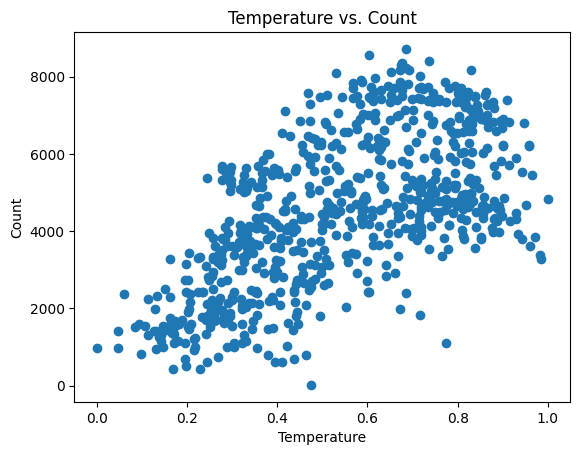

In [ ]:
plt.scatter(df['temp'], df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs. Count')
plt.show()

## Correlation Analysis

correlation matrix

In [ ]:
correlation_matrix = df.corr()

<ipython-input-23-68bbfff3c4eb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


heatmap visualization of the correlation matrix

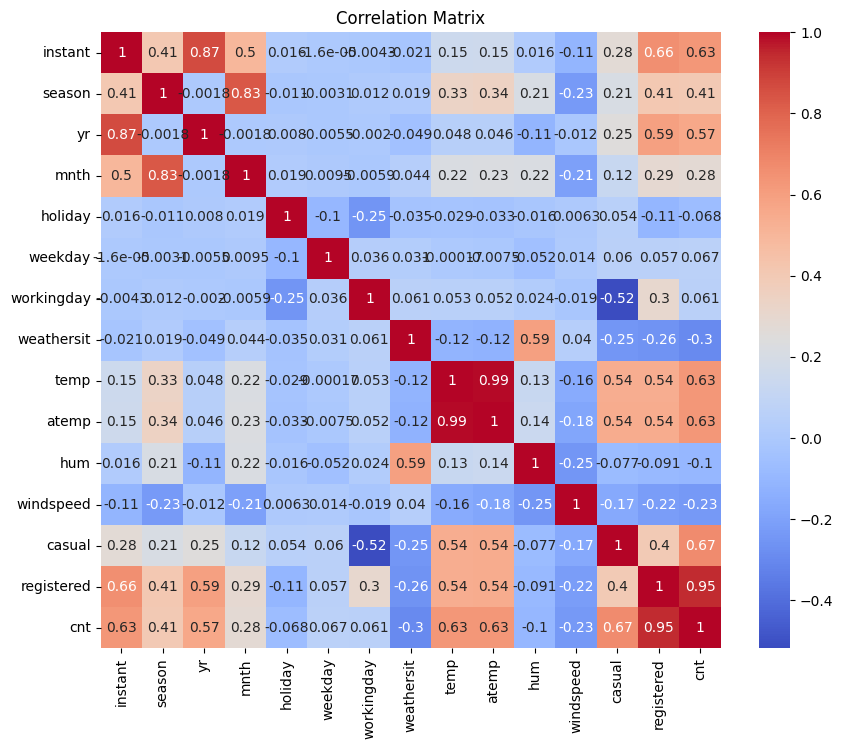

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Time Series Analysis

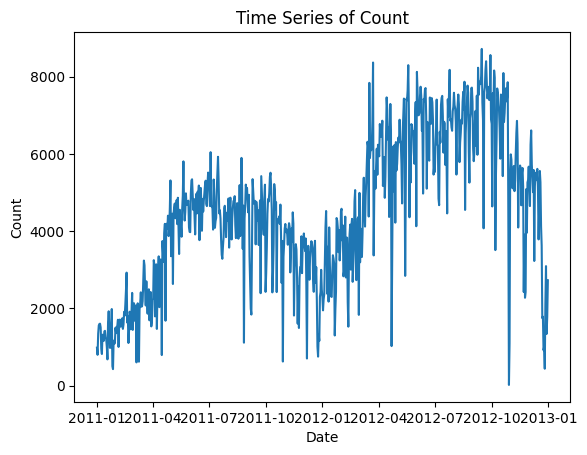

In [ ]:
df.set_index('dteday', inplace=True)
plt.plot(df['cnt'])
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Series of Count')
plt.show()